### Piont data anlysis
This script will walk you through the basic point data anlysis using Tethys library. The scripts below includes retrieving data from envlib.org, plotting composite averages, plotting statistical distributions using violin plots and windrose for wind data.

#### import libraries

In [1]:
from tethysts import Tethys
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
from envlib_helper import *

The line below initiates the Tethys instance (service) before retrieving data from the server.

In [2]:
ts = Tethys()

We can get information of all the available datasets on [envlib.org](https://www.envlib.org) using the following line. This will save an excel file called "envlib_data_catalog.xlsx" in the current Jupyter environment. Once created, you can download to your own computer and find the information you need in the later process to retrieve any specific data.
You can also check the [web GUI](https://wai.tethys-ts.xyz) for all the information.

In [48]:
get_all_dataset_information(ts)

#### Retrive a point data

You can use various ways to retrive time series from any point locations (AWS statoin observation, WRF simulation etc.). The code below demenstrates a most commonly way of retriving a dataset from the closiest lat and lon. The below example will retrieve all tier1 datasets from a FENZ AWS.

In [10]:
owner = "FENZ"
method = "sensor_recording"
product_code = "raw_data"
lat = -43.47
lon = 171.672

In [47]:
station_data=get_data_from_lat_lon(ts,owner,method,product_code,lat,lon)

In [ ]:
station_data

### Composite average anlysis 

Composite average is commonly used for climatological anlysis.

In [341]:
plot_data = station_data.sel(time=slice("2020-01-01", "2021-12-31")) # change the data range accordingly

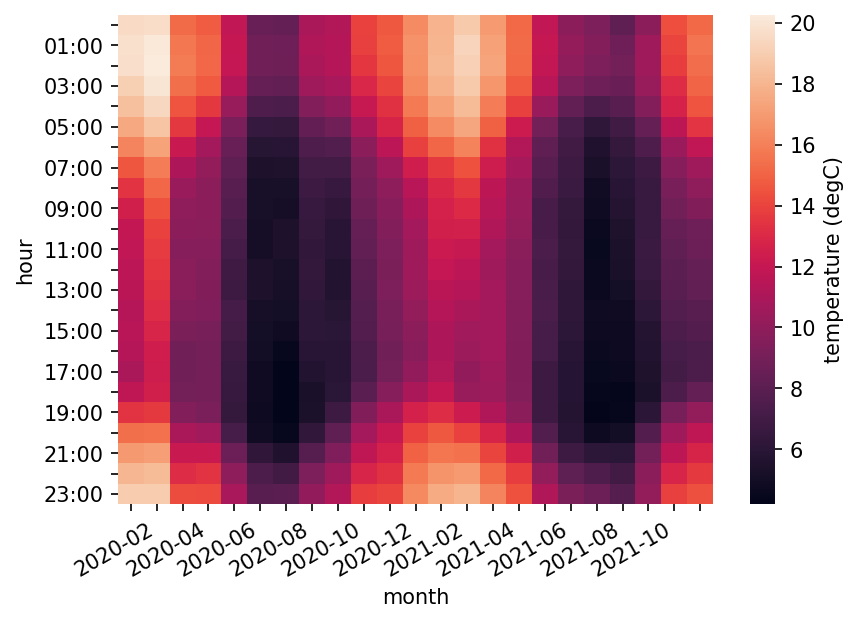

In [342]:
plot_hourly_composite(plot_data["temperature"],time_zone='UTC',average="month")

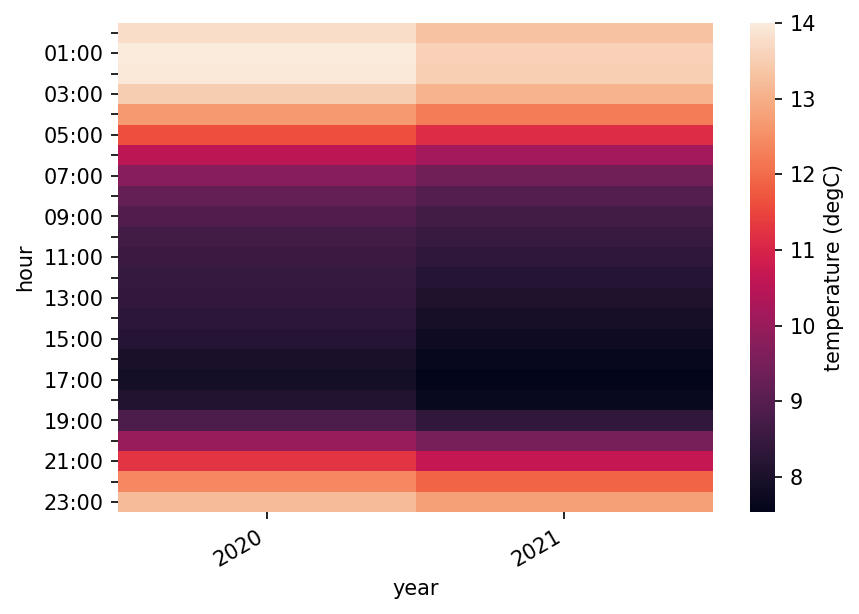

In [343]:
plot_hourly_composite(plot_data["temperature"],time_zone='UTC',average="year")

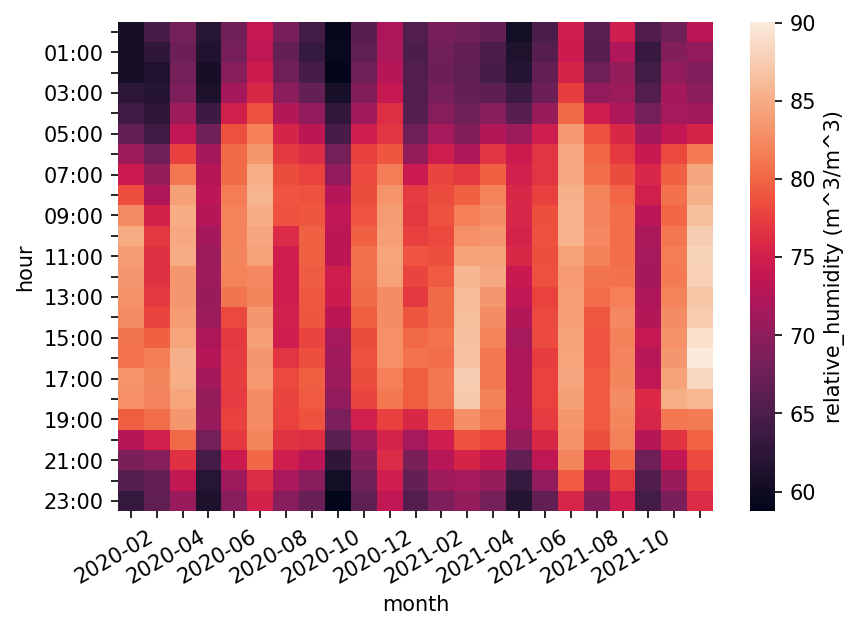

In [348]:
plot_hourly_composite(plot_data["relative_humidity"],time_zone='UTC',average="month")

### violin plot

#### select time period

In [350]:
plot_data = station_data.sel(time=slice("2020-01-01", "2021-12-31")) # change the data range accordingly

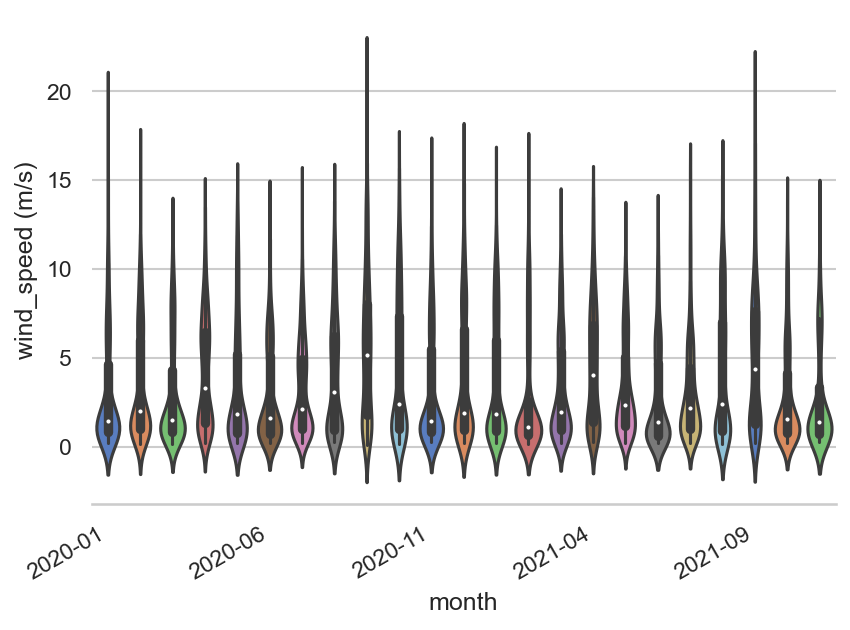

In [352]:
plot_violinplot(plot_data["wind_speed"],"month")

#### Windrose

In [353]:
plot_data = station_data.sel(time=slice("2020-01-01", "2021-12-31")) # change the data range accordingly

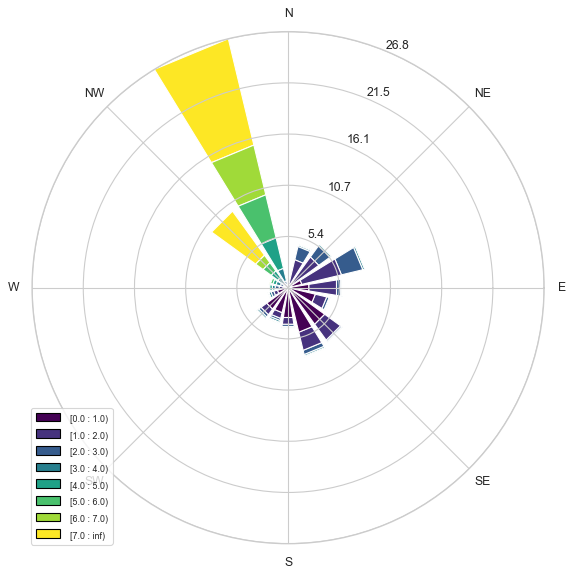

In [354]:
plot_wind_rose(plot_data.wind_speed,plot_data.wind_direction)